<a href="https://colab.research.google.com/github/GabrielxKuek/neural-network-classification-tutorial/blob/main/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tf_keras
import tensorflow_hub as hub

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/wine-reviews.csv", usecols=["country", "description", "points", "price", "variety", "winery"])

df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [4]:
df.dropna(subset=["description", "points"])

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss


In [5]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


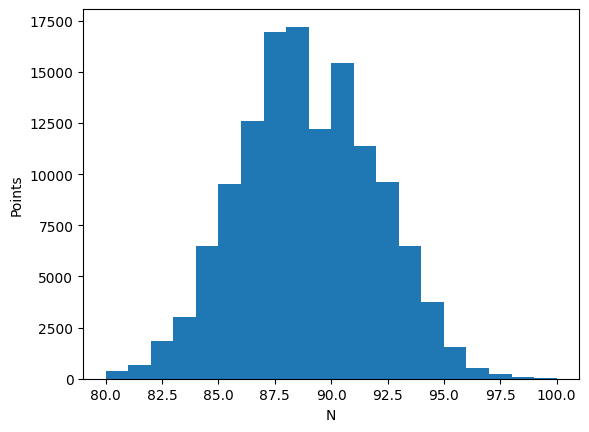

In [7]:
plt.hist(df.points, bins=20)
plt.xlabel("N")
plt.ylabel("Points")
plt.show()

In [8]:
df['label'] = (df.points >= 90).astype(int)
df = df[['description', 'points', 'label']]

df.head()

,description,points,label
0,"Aromas include tropical fruit, broom, brimston...",87,0
1,"This is ripe and fruity, a wine that is smooth...",87,0
2,"Tart and snappy, the flavors of lime flesh and...",87,0
3,"Pineapple rind, lemon pith and orange blossom ...",87,0
4,"Much like the regular bottling from 2012, this...",87,0


In [9]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [26]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df['description']
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [27]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [32]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

In [33]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.4403376 , -0.07500512,  0.30748126, ..., -0.12188073,
        -0.27539364,  0.12042159],
       [ 0.26150477, -0.3069712 ,  0.07009915, ..., -0.16910756,
        -0.07016427,  0.28866208],
       [ 0.29634634,  0.09124565, -0.01974645, ...,  0.10931743,
        -0.32395726,  0.04095408],
       ...,
       [ 0.5533851 , -0.29541925, -0.12268824, ..., -0.03464597,
        -0.17469384, -0.22345808],
       [ 0.31732026, -0.37977645,  0.27630824, ..., -0.03527464,
         0.02353789,  0.11011313],
       [ 0.4615093 , -0.074825  , -0.25695527, ..., -0.2138217 ,
        -0.21321864,  0.10562587]], dtype=float32)>

In [38]:
model = tf_keras.Sequential()
model.add(hub_layer)

model.add(tf_keras.layers.Dense(16, activation="relu"))
model.add(tf_keras.layers.Dense(16, activation="relu"))
model.add(tf_keras.layers.Dense(1, activation="sigmoid"))

In [47]:
model.compile(
    optimizer=tf_keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy(),
    metrics='accuracy'
)

In [48]:
model.evaluate(train_data)

102/102 [==============================] - 4s 28ms/step - loss: 0.6740 - accuracy: 0.6199


[0.6740057468414307, 0.6198738217353821]

In [49]:
history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
102/102 [==============================] - 179s 2s/step - loss: 0.5373 - accuracy: 0.7192 - val_loss: 0.4139 - val_accuracy: 0.8053
Epoch 2/10
102/102 [==============================] - 191s 2s/step - loss: 0.3669 - accuracy: 0.8332 - val_loss: 0.3778 - val_accuracy: 0.8253
Epoch 3/10
102/102 [==============================] - 194s 2s/step - loss: 0.3258 - accuracy: 0.8551 - val_loss: 0.3752 - val_accuracy: 0.8277
Epoch 4/10
102/102 [==============================] - 191s 2s/step - loss: 0.3019 - accuracy: 0.8694 - val_loss: 0.3745 - val_accuracy: 0.8300
Epoch 5/10
102/102 [==============================] - 168s 2s/step - loss: 0.2844 - accuracy: 0.8782 - val_loss: 0.3790 - val_accuracy: 0.8310
Epoch 6/10
102/102 [==============================] - 193s 2s/step - loss: 0.2704 - accuracy: 0.8860 - val_loss: 0.3847 - val_accuracy: 0.8303
Epoch 7/10
102/102 [==============================] - 195s 2s/step - loss: 0.2580 - accuracy: 0.8919 - val_loss: 0.3934 - val_accuracy: 0.8320

In [54]:
list(train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b'Clean and stylish, with hints of ginger ale and citrus on the nose. Good in terms of texture and flavors, with citrus and juicy nectarine working the palate. Focused and fairly long on the finish, with depth and integrity. Sweet in the extra dry style, but not candied or artificially sugared.',
        b"Lovely pure notes of red crunchy cherry dominate the nose. They are also present on the slender, almost slight, palate that is completely dry but full of the charm of the fruit. Ample freshness brightens the entire wine which is well-suited to being chilled. It's a friendly easy charming red.",
        b'Unusual for a Bordeaux, this is 100% Cabernet Sauvignon. It has plenty of tannins, although they are embedded in the pure black-currant fruits and the acidity. It shows the gentle side of Comtesse\xe2\x80\x94fruit and freshness\xe2\x80\x94although with spice and a touch of wood that are likely to balance soon. The wine will dev

Batch shape: (1024,)
Sample data: (<tf.Tensor: shape=(1024,), dtype=string, numpy=
array([b"There's no denying the fact that this smells stalky and burnt, with leathery fruit aromas. In the mouth, it's choppy, with scratchy acidity leading to a loud flavor profile with stalky berry, raisin and stewed flavors. Heat and additional roasted notes drive the finish on this Malbec.",
       b'Medium gold in color, with a slight pink hue, this carries the aroma of canned tropical-fruit cocktail\xe2\x80\x94tin and all. The peach-juice palate is viscous and round, almost oily, while the tart, tropical acidity struggles to bring balance.',
       b'For those who like their white wines distinctly sweet, this tastes like apricot and orange jam, with the stimulating heat of alcohol.',
       ...,
       b'Ruby to the eye, this wine has an enticing bouquet of black cherry and soft baking spices. Flavors of black cherry, cranberry, vanilla, sage and orange rind are at home amid a labyrinth of soft but